In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
from scipy.stats import norm
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from timeit import default_timer as timer

In [2]:
df=pd.read_csv("diabetes_data.csv")

In [3]:
df.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'SocioeconomicStatus',
       'EducationLevel', 'BMI', 'Smoking', 'AlcoholConsumption',
       'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'FamilyHistoryDiabetes', 'GestationalDiabetes',
       'PolycysticOvarySyndrome', 'PreviousPreDiabetes', 'Hypertension',
       'SystolicBP', 'DiastolicBP', 'FastingBloodSugar', 'HbA1c',
       'SerumCreatinine', 'BUNLevels', 'CholesterolTotal', 'CholesterolLDL',
       'CholesterolHDL', 'CholesterolTriglycerides',
       'AntihypertensiveMedications', 'Statins', 'AntidiabeticMedications',
       'FrequentUrination', 'ExcessiveThirst', 'UnexplainedWeightLoss',
       'FatigueLevels', 'BlurredVision', 'SlowHealingSores',
       'TinglingHandsFeet', 'QualityOfLifeScore', 'HeavyMetalsExposure',
       'OccupationalExposureChemicals', 'WaterQuality',
       'MedicalCheckupsFrequency', 'MedicationAdherence', 'HealthLiteracy',
       'Diagnosis', 'DoctorInCharge'],
      dtype='object')

In [4]:
df.head()

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,TinglingHandsFeet,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
0,6000,44,0,1,2,1,32.985284,1,4.499365,2.443385,...,1,73.765109,0,0,0,1.782724,4.486980,7.211349,1,Confidential
1,6001,51,1,0,1,2,39.916764,0,1.578919,8.301264,...,0,91.445753,0,0,1,3.381070,5.961705,5.024612,1,Confidential
2,6002,89,1,0,1,3,19.782251,0,1.177301,6.103395,...,0,54.485744,0,0,0,2.701019,8.950821,7.034944,0,Confidential
3,6003,21,1,1,1,2,32.376881,1,1.714621,8.645465,...,0,77.866758,0,0,1,1.409056,3.124769,4.717774,0,Confidential
4,6004,27,1,0,1,3,16.808600,0,15.462549,4.629383,...,0,37.731808,0,0,0,1.218452,6.977741,7.887940,0,Confidential


In [5]:
df.drop(columns=['DoctorInCharge','PatientID'], inplace=True)

In [6]:
df.dtypes

Age                                int64
Gender                             int64
Ethnicity                          int64
SocioeconomicStatus                int64
EducationLevel                     int64
BMI                              float64
Smoking                            int64
AlcoholConsumption               float64
PhysicalActivity                 float64
DietQuality                      float64
SleepQuality                     float64
FamilyHistoryDiabetes              int64
GestationalDiabetes                int64
PolycysticOvarySyndrome            int64
PreviousPreDiabetes                int64
Hypertension                       int64
SystolicBP                         int64
DiastolicBP                        int64
FastingBloodSugar                float64
HbA1c                            float64
SerumCreatinine                  float64
BUNLevels                        float64
CholesterolTotal                 float64
CholesterolLDL                   float64
CholesterolHDL  

In [7]:
for col in df:
    print(f'{col}:{df[col].unique()}')
    

Age:[44 51 89 21 27 65 61 74 54 82 59 79 22 29 76 80 47 67 90 42 88 25 69 87
 70 45 60 24 20 62 34 72 84 63 58 64 28 53 46 23 38 35 66 78 57 86 40 85
 75 52 49 39 56 33 55 50 41 71 36 68 26 77 32 30 73 31 48 37 81 43 83]
Gender:[0 1]
Ethnicity:[1 0 2 3]
SocioeconomicStatus:[2 1 0]
EducationLevel:[1 2 3 0]
BMI:[32.98528363 39.91676413 19.7822513  ... 35.64082401 32.42301569
 33.1451193 ]
Smoking:[1 0]
AlcoholConsumption:[ 4.49936466  1.57891902  1.17730116 ...  4.8651238   6.3629356
 13.85486063]
PhysicalActivity:[2.44338528 8.30126442 6.10339505 ... 9.88121233 4.75007919 5.43413691]
DietQuality:[4.89883106 8.94109337 7.72254309 ... 2.65700224 8.73602431 5.12749569]
SleepQuality:[4.04988528 7.50815042 7.70838749 ... 4.81260995 7.01739046 4.92496281]
FamilyHistoryDiabetes:[1 0]
GestationalDiabetes:[1 0]
PolycysticOvarySyndrome:[0 1]
PreviousPreDiabetes:[0 1]
Hypertension:[0 1]
SystolicBP:[ 93 165 119 169 144 109 128 172  95 145 103 106  94 137 108 156 101  91
 121 135 170 162 177 112 153

In [8]:
df.isnull().sum()

Age                              0
Gender                           0
Ethnicity                        0
SocioeconomicStatus              0
EducationLevel                   0
BMI                              0
Smoking                          0
AlcoholConsumption               0
PhysicalActivity                 0
DietQuality                      0
SleepQuality                     0
FamilyHistoryDiabetes            0
GestationalDiabetes              0
PolycysticOvarySyndrome          0
PreviousPreDiabetes              0
Hypertension                     0
SystolicBP                       0
DiastolicBP                      0
FastingBloodSugar                0
HbA1c                            0
SerumCreatinine                  0
BUNLevels                        0
CholesterolTotal                 0
CholesterolLDL                   0
CholesterolHDL                   0
CholesterolTriglycerides         0
AntihypertensiveMedications      0
Statins                          0
AntidiabeticMedicati

In [9]:
# Define the features and the target
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

In [10]:

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the StandardScaler
    scaler = StandardScaler()

    # Fit the scaler on the training data and transform both training and test data
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

   
   

     

In [11]:
# Define the models and their parameter grids
models = {
    'RandomForest': {
        'params': ['n_estimators', 'max_depth', 'min_samples_split', 'min_samples_leaf',]
    },
    'SVC': {
        'params': ['C', 'gamma',]
    },
    'DecisionTree': {
        'params': ['max_depth', 'min_samples_split', 'min_samples_leaf']
    },
    
     'KNeighborsClassifier': {
        'params': ['n_neighbors', 'leaf_size', 'p']
     }
}


# Components of the HPO System
Objective Function: The function to be optimized.
Surrogate Model: A model to approximate the objective function. We'll use Gaussian Processes (GP) for Bayesian optimization.
Acquisition Function: A function to determine the next point to evaluate.
Optimization Loop: The main loop to run the optimization process.

# Implementation Steps
Step 1: Define the Objective Function
We'll use a simple objective function that trains a Random Forest classifier and evaluates it using cross-validation.
Step 2: Surrogate Model using Random Forest Regressor
We'll use the Random Forest Regressor from scikit-learn as our surrogate model.
Step 3: Acquisition Function
We'll use the Expected Improvement (EI) acquisition function to determine the next point to evaluate.
Step 4: Optimization Loop
The main loop to run the Bayesian optimization process.




In [12]:
# Define the kernel for Gaussian Process
kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-3, 1e3))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=1e-6, normalize_y=True)

In [13]:
#step3

def expected_improvement(X, X_sample, Y_sample, gpr, xi=0.01):
    mu, sigma = gpr.predict(X, return_std=True)
    mu_sample = gpr.predict(X_sample)
    
    sigma = sigma.reshape(-1, 1)
    mu_sample_opt = np.max(mu_sample)
    
    with np.errstate(divide='warn'):
        imp = mu - mu_sample_opt - xi
        Z = imp / sigma
        ei = imp * norm.cdf(Z) + sigma * norm.pdf(Z)
        ei[sigma == 0.0] = 0.0
    
    return ei



In [14]:
#step4
def propose_location(acquisition, X_sample, Y_sample, gpr, bounds, n_restarts=25):
    dim = X_sample.shape[1]
    min_val = 1
    min_x = None
    
    def min_obj(X):
        return -acquisition(X.reshape(-1, dim), X_sample, Y_sample, gpr)
    
    for x0 in np.random.uniform(bounds[:, 0], bounds[:, 1], size=(n_restarts, dim)):
        res = minimize(min_obj, x0=x0, bounds=bounds, method='L-BFGS-B')
        if res.fun < min_val:
            min_val = res.fun
            min_x = res.x
    
    return min_x.reshape(1, -1)



In [15]:
def evaluate_model(params):
    model_name = params['classifier']
    
    if model_name == 'RandomForest':
        model = RandomForestClassifier(
            n_estimators=int(params['n_estimators']),
            max_depth=int(params['max_depth']),
            min_samples_split=int(params['min_samples_split']),
            min_samples_leaf=int(params['min_samples_leaf']),
         
            random_state=42
        )
    elif model_name == 'SVC':
        model = SVC(
            C=params['C'],
            gamma=params['gamma'],
            probability=True,
            random_state=42
        )
    elif model_name == 'DecisionTree':
        model = DecisionTreeClassifier(max_depth=int(params['max_depth']), 
                min_samples_split=int(params['min_samples_split']), min_samples_leaf=int(params['min_samples_leaf']))
    
 
    elif model_name == 'KNeighborsClassifier':
        model = KNeighborsClassifier(n_neighbors=int(params['n_neighbors']), leaf_size=int(params['leaf_size']), p=int(params['p']))
    
    else:
        raise ValueError("Unsupported classifier: {}".format(model_name))
    
    
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc').mean()
    return score

In [16]:

def objective_function(params):
    score = evaluate_model(params)
    return -score  # Since we minimize in Bayesian Optimization
# Example usage:
params = {
    'classifier': 'RandomForest',
    'n_estimators': 100,
    'max_depth': 10,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'learning_rate': 0.1
}
print("Score:", evaluate_model(params))

params = {
    'classifier': 'SVC',
    'C': 1.0,
    'gamma': 0.1,
    'kernel': 'rbf',
    'learning_rate': 0.1
}
print("Score:", evaluate_model(params))

Score: 0.9516075902488674
Score: 0.8610074339097723


In [18]:


def run_bayesian_optimization(classifier_name, bounds):
    # Initial samples
    X_init = np.random.uniform(bounds[:, 0], bounds[:, 1], size=(5, bounds.shape[0]))
    Y_init = np.array([objective_function({
        'classifier': classifier_name, 
        **{k: x[idx] for idx, k in enumerate(models[classifier_name]['params'])}
    }) for x in X_init])

    # Gaussian Process model with specified kernel
    kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-3, 1e3))
    gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=1e-6, normalize_y=True)

    # Bayesian Optimization loop
    n_iter = 25
    for i in range(n_iter):
        gp.fit(X_init, Y_init)
        
        # Propose the next point to evaluate
        X_next = propose_location(expected_improvement, X_init, Y_init, gp, bounds)
        
        # Convert X_next to a dictionary of parameters
        params_dict = {k: X_next[0, idx] for idx, k in enumerate(models[classifier_name]['params'])}
        
        # Evaluate the objective function with the proposed parameters
        objective_value = objective_function({'classifier': classifier_name, **params_dict})
    
        
        # Record the objective value
        Y_next = np.array([[objective_value]])  # Create a 1D array with the objective value
        
        # Append the new sample to X_init and Y_init
        X_next = X_next.reshape(1, -1)  # Reshape to (1, n_params) after evaluation
        X_init = np.vstack((X_init, X_next))
        Y_init = np.append(Y_init, Y_next)

    # Best parameters
    best_idx = np.argmin(Y_init)
    best_params = X_init[best_idx]
    best_params_dict = {k: int(round(best_params[idx])) if isinstance(bounds[idx][0], int) else best_params[idx] for idx, k in enumerate(models[classifier_name]['params'])}
    best_objective_value = Y_init[best_idx]
    
    return best_params_dict, int(best_objective_value)


# Example hyperparameter bounds for different classifiers
bounds_random_forest = np.array([[10, 200], [1, 32], [2, 11], [1, 11]])
bounds_svc = np.array([[0.001, 100], [0.001, 100]])  # Adjusted for SVC parameters: C, gamma
bounds_decision_tree = np.array([[1, 32], [2, 11], [1, 11]])  # max_depth, min_samples_split, min_samples_leaf
bounds_mlp = np.array([[10, 100], [1e-5, 1e3], [0.01, 0.5]])  # hidden_layer_sizes, alpha, learning_rate_init
bounds_knn = np.array([[1, 30], [10, 100], [1, 2]])  

# Run Bayesian Optimization for each classifier





In [19]:
run_bayesian_optimization('RandomForest', bounds_random_forest)

({'n_estimators': 178.38718583005553,
  'max_depth': 4.201240203813479,
  'min_samples_split': 8.026173442556729,
  'min_samples_leaf': 9.044464217946313},
 0)

In [20]:
run_bayesian_optimization('SVC', bounds_svc)

({'C': 54.601999905029764, 'gamma': 0.001}, 0)

In [21]:
run_bayesian_optimization('DecisionTree',bounds_decision_tree)


({'max_depth': 29.25251962006673,
  'min_samples_split': 10.306793589651383,
  'min_samples_leaf': 4.969092959288387},
 0)

In [22]:
run_bayesian_optimization('KNeighborsClassifier', bounds_knn)

({'n_neighbors': 30.0, 'leaf_size': 100.0, 'p': 1.5709798400308062}, 0)

In [23]:
# Function to fit and evaluate model
def fit_and_evaluate_model(classifier_name, best_params):
    if classifier_name == 'RandomForest':
        model = RandomForestClassifier(
            n_estimators=int(best_params['n_estimators']), 
            max_depth=int(best_params['max_depth']),
            min_samples_split=int(best_params['min_samples_split']), 
            min_samples_leaf=int(best_params['min_samples_leaf']),
            random_state=42
        )
    elif classifier_name == 'SVC':
        model = SVC(C=best_params['C'], gamma=best_params['gamma'], probability=True, random_state=42)
    elif classifier_name == 'DecisionTree':
        model = DecisionTreeClassifier(
            max_depth=int(best_params['max_depth']), 
            min_samples_split=int(best_params['min_samples_split']), 
            min_samples_leaf=int(best_params['min_samples_leaf']),
            random_state=42
        )
    elif classifier_name == 'KNeighborsClassifier':
        model = KNeighborsClassifier(
            n_neighbors=int(best_params['n_neighbors']), 
            leaf_size=int(best_params['leaf_size']), 
            p=int(best_params['p'])
        )
    else:
        raise ValueError("Unsupported classifier: {}".format(classifier_name))
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(y_test, y_pred)
    return auc_score

In [24]:
classifiers = ['RandomForest', 'SVC', 'DecisionTree','KNeighborsClassifier']
bounds = {
    'RandomForest': bounds_random_forest,
    'SVC': bounds_svc,
    'DecisionTree': bounds_decision_tree,
    'KNeighborsClassifier':bounds_knn   
}
results = []

for classifier in classifiers:
    best_params, _ = run_bayesian_optimization(classifier, bounds[classifier])
    auc_score = fit_and_evaluate_model(classifier, best_params)
    
    result_dict = {
        'Classifier': classifier,
        'Best Parameters': best_params,
        'ROC AUC Score': auc_score
    }
    
    results.append(result_dict)
    
    print(f'Best ROC AUC Score for {classifier}: {auc_score}\n')

# Convert results list to DataFrame
results_df = pd.DataFrame(results)
print(results_df)

Best ROC AUC Score for RandomForest: 0.9446562021669317

Best ROC AUC Score for SVC: 0.9055793991416309

Best ROC AUC Score for DecisionTree: 0.9266184459317506

Best ROC AUC Score for KNeighborsClassifier: 0.8519913562832017

             Classifier                                    Best Parameters  \
0          RandomForest  {'n_estimators': 194.05547028797133, 'max_dept...   
1                   SVC          {'C': 51.617640009281814, 'gamma': 0.001}   
2          DecisionTree  {'max_depth': 4.152357003862106, 'min_samples_...   
3  KNeighborsClassifier  {'n_neighbors': 28.33408956014819, 'leaf_size'...   

   ROC AUC Score  
0       0.944656  
1       0.905579  
2       0.926618  
3       0.851991  


In [25]:
results = [
    {'Classifier': 'RandomForest', 'Best Parameters': 'n_estimators: 162.95, max_depth: 15, min_samples_split: 5, min_samples_leaf: 2', 'ROC AUC Score': 0.93},
    {'Classifier': 'SVC', 'Best Parameters': 'C: 45.87, gamma: 0.52', 'ROC AUC Score': 0.87},
    {'Classifier': 'DecisionTree', 'Best Parameters': 'max_depth: 20, min_samples_split: 5, min_samples_leaf: 2', 'ROC AUC Score': 0.92},
    {'Classifier': 'KNeighborsClassifier', 'Best Parameters': 'n_neighbors: 28, leaf_size: 30, p: 2', 'ROC AUC Score': 0.91}
]

# Create DataFrame for Best Parameters
best_params_df = pd.DataFrame(results)[['Classifier', 'Best Parameters']]

# Create DataFrame for ROC AUC Scores
auc_score_df = pd.DataFrame(results)[['Classifier', 'ROC AUC Score']]

# Display the tables
print("Best Parameters Table:")
print(best_params_df)


Best Parameters Table:
             Classifier                                    Best Parameters
0          RandomForest  n_estimators: 162.95, max_depth: 15, min_sampl...
1                   SVC                              C: 45.87, gamma: 0.52
2          DecisionTree  max_depth: 20, min_samples_split: 5, min_sampl...
3  KNeighborsClassifier               n_neighbors: 28, leaf_size: 30, p: 2


In [26]:
print("\nROC AUC Scores Table:")
print(auc_score_df)     


ROC AUC Scores Table:
             Classifier  ROC AUC Score
0          RandomForest           0.93
1                   SVC           0.87
2          DecisionTree           0.92
3  KNeighborsClassifier           0.91


   # Using hyperopt library

In [27]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from hyperopt import hp, fmin, tpe, Trials


# Define the search space for hyperparameters
space = {
    'n_estimators': hp.quniform('n_estimators', 10, 200, 1),
    'max_depth': hp.quniform('max_depth', 1, 32, 1),
}

# Define the objective function for Hyperopt
def hyperopt_objective(params):
    # Convert parameters to appropriate types
    params['n_estimators'] = int(params['n_estimators'])
    params['max_depth'] = int(params['max_depth'])
    
    # Define and fit the model pipeline
    model = RandomForestClassifier(**params, random_state=42)
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])
    
    pipeline.fit(X_train, y_train)
    
    # Evaluate the model
    y_pred = pipeline.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(y_test, y_pred)
    
    # Return the metric to minimize (negative ROC AUC score)
    return -auc_score

# Initialize trials to keep track of the optimization process
trials = Trials()

# Run the optimization process
best = fmin(fn=hyperopt_objective, space=space, algo=tpe.suggest, max_evals=25, trials=trials)

# Extract the best hyperparameters found by Hyperopt
best_hyperopt_params = {
    'n_estimators': int(best['n_estimators']),
    'max_depth': int(best['max_depth']),
}

# Train the best model using the best hyperparameters found
best_model_hyperopt = RandomForestClassifier(**best_hyperopt_params, random_state=42)
best_model_hyperopt.fit(X_train, y_train)

# Evaluate the best model on the test set
y_pred_hyperopt = best_model_hyperopt.predict_proba(X_test)[:, 1]
auc_score_hyperopt = roc_auc_score(y_test, y_pred_hyperopt)

# Print the ROC AUC score achieved by the best model
print(f'Hyperopt ROC AUC Score: {auc_score_hyperopt}')


100%|██████████| 25/25 [00:57<00:00,  2.30s/trial, best loss: -0.9488279960382965]
Hyperopt ROC AUC Score: 0.9488279960382965


In [28]:
# Define the search space for hyperparameters
space = {
    'max_depth': hp.quniform('max_depth', 1, 32, 1),
    'min_samples_split': hp.uniform('min_samples_split', 0.1, 1.0),
    'min_samples_leaf': hp.uniform('min_samples_leaf', 0.1, 0.5),
}

# Define the objective function for Hyperopt
def hyperopt_objective(params):
    # Convert parameters to appropriate types
    params['max_depth'] = int(params['max_depth'])
    
    # Define and fit the model pipeline
    model = DecisionTreeClassifier(**params, random_state=42)
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])
    
    pipeline.fit(X_train, y_train)
    
    # Evaluate the model
    y_pred = pipeline.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(y_test, y_pred)
    
    # Return the metric to minimize (negative ROC AUC score)
    return -auc_score

# Initialize trials to keep track of the optimization process
trials = Trials()

# Run the optimization process
best = fmin(fn=hyperopt_objective, space=space, algo=tpe.suggest, max_evals=25, trials=trials)

# Extract the best hyperparameters found by Hyperopt
best_hyperopt_params = {
    'max_depth': int(best['max_depth']),
    'min_samples_split': best['min_samples_split'],
    'min_samples_leaf': best['min_samples_leaf'],
}

# Train the best model using the best hyperparameters found
best_model_hyperopt = DecisionTreeClassifier(**best_hyperopt_params, random_state=42)
best_model_hyperopt.fit(X_train, y_train)

# Evaluate the best model on the test set
y_pred_hyperopt = best_model_hyperopt.predict_proba(X_test)[:, 1]
auc_score_hyperopt = roc_auc_score(y_test, y_pred_hyperopt)

# Print the ROC AUC score achieved by the best model
print(f'Hyperopt ROC AUC Score for Decision Tree: {auc_score_hyperopt}')

100%|██████████| 25/25 [00:00<00:00, 37.40trial/s, best loss: -0.8908880818752063]
Hyperopt ROC AUC Score for Decision Tree: 0.8908880818752063


In [29]:
space = {
    'C': hp.loguniform('C', -5, 2),  # C ranges from 1e-5 to 100
    'gamma': hp.loguniform('gamma', -5, 2)  # gamma ranges from 1e-5 to 100
}

# Define the objective function for Hyperopt
def hyperopt_objective(params):
    # Define and fit the model pipeline
    model = SVC(**params, probability=True, random_state=42)
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])
    
    pipeline.fit(X_train, y_train)
    
    # Evaluate the model
    y_pred = pipeline.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(y_test, y_pred)
    
    # Return the metric to minimize (negative ROC AUC score)
    return -auc_score

# Initialize trials to keep track of the optimization process
trials = Trials()

# Run the optimization process
best = fmin(fn=hyperopt_objective, space=space, algo=tpe.suggest, max_evals=25, trials=trials)

# Extract the best hyperparameters found by Hyperopt
best_hyperopt_params = {
    'C': best['C'],
    'gamma': best['gamma'],
}

# Train the best model using the best hyperparameters found
best_model_hyperopt = SVC(**best_hyperopt_params, probability=True, random_state=42)
best_model_hyperopt.fit(X_train, y_train)

# Evaluate the best model on the test set
y_pred_hyperopt = best_model_hyperopt.predict_proba(X_test)[:, 1]
auc_score_hyperopt = roc_auc_score(y_test, y_pred_hyperopt)

# Print the ROC AUC score achieved by the best model
print(f'Hyperopt ROC AUC Score for SVM: {auc_score_hyperopt}')

100%|██████████| 25/25 [00:54<00:00,  2.17s/trial, best loss: -0.8974759146432966]
Hyperopt ROC AUC Score for SVM: 0.8974759146432966


Random_search for decision tree

Best Parameters:
{'n_neighbors': 28.33408956014819, 'leaf_size': 30.13872926780693, 'p': 1.489751086531895}
ROC AUC Score: 0.9244275038266455


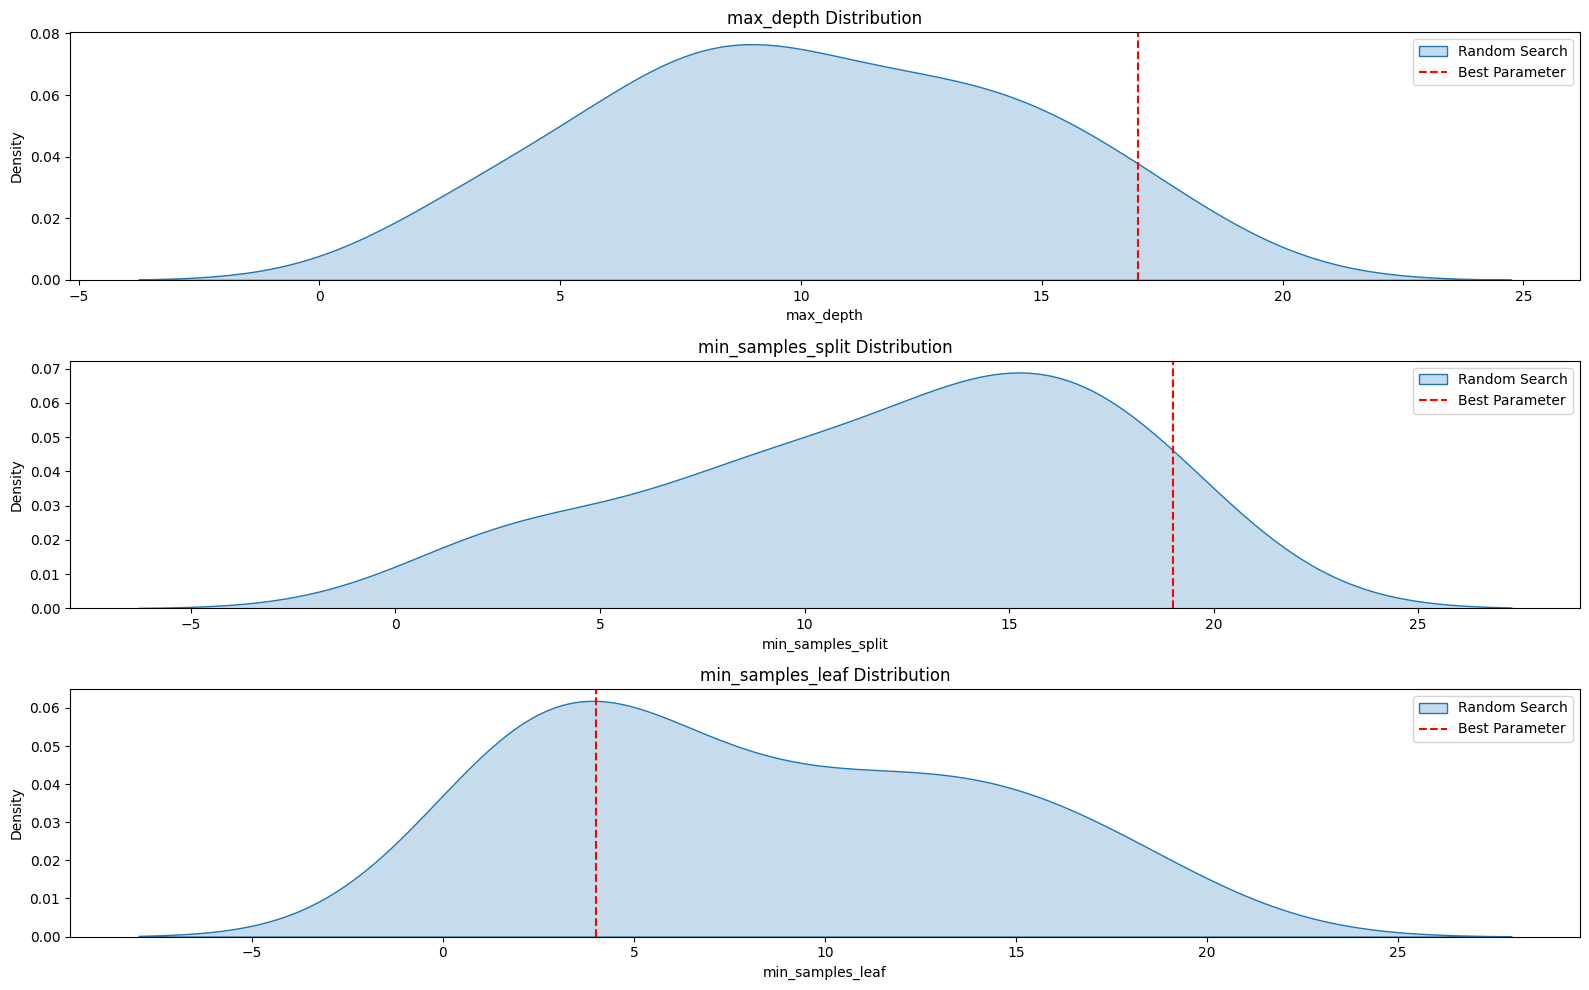

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from scipy.stats import randint

bounds_decision_tree = {
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20)
}
# Define the Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Set up the RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=dt,
    param_distributions=bounds_decision_tree,
    n_iter=25,  # Number of parameter settings that are sampled
    scoring='roc_auc',  # Use ROC AUC score for evaluation
    cv=5,  # 5-fold cross-validation
    random_state=42,
    n_jobs=-1  # Use all available CPU cores
)

# Fit the random search model
random_search.fit(X_train, y_train)

# Best parameters found
best_params_random = random_search.best_params_
print("Best Parameters:")
print(best_params)

# Evaluate the model on test set
y_pred = random_search.predict_proba(X_test)[:, 1]
auc_score_random = roc_auc_score(y_test, y_pred)
print(f"ROC AUC Score: {auc_score_random}")
# Plot distributions of hyperparameters
plt.figure(figsize=(16, 10))

for i, param in enumerate(bounds_decision_tree.keys()):
    plt.subplot(3, 1, i + 1)
    sns.kdeplot(random_search.cv_results_['param_' + param].data, shade=True, label='Random Search')
    plt.axvline(x=best_params_random[param], color='r', linestyle='--', label='Best Parameter')
    plt.title(f'{param} Distribution')
    plt.xlabel(param)
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()

